In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
import statsmodels.api as sm

In [3]:
pbiq_nu = pd.read_stata('/home/alvin/Desktop/Python/pbiQ.dta')

pbiq = pbiq_nu['pbi']
pbiq.index = pbiq_nu.time
pbiq_nu.head(10)

,pbi,t,time,t2,t3,t4,y,lpbi,dlpbi,dlpbi4,res_ar1,res_ar2,res_arma11,res_ar124ma1,res_ar12ma4
0,36357.476562,1,1980-01-01,1.0,1.0,1.0,0.0,10.501155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43102.109375,2,1980-04-01,4.0,8.0,16.0,0.0,10.671328,0.170172,NaN,NaN,NaN,NaN,NaN,NaN
2,42344.484375,3,1980-07-01,9.0,27.0,81.0,0.0,10.653593,-0.017734,NaN,NaN,NaN,NaN,NaN,NaN
3,45791.929688,4,1980-10-01,16.0,64.0,256.0,0.0,10.731863,0.078270,NaN,NaN,NaN,NaN,NaN,NaN
4,39025.875000,5,1981-01-01,25.0,125.0,625.0,0.0,10.571980,-0.159883,0.070825,0.039805,0.040342,0.040108,0.040288,0.040001
5,45857.886719,6,1981-04-01,36.0,216.0,1296.0,0.0,10.733302,0.161322,0.061975,-0.000413,-0.000400,-0.000375,-0.000403,-0.001416
6,45002.691406,7,1981-07-01,49.0,343.0,2401.0,0.0,10.714478,-0.018825,0.060884,0.005470,0.012344,0.011152,0.012312,0.011027
7,47014.550781,8,1981-10-01,64.0,512.0,4096.0,0.0,10.758212,0.043735,0.026349,-0.028205,-0.024865,-0.028837,-0.024136,-0.024000
8,40474.847656,9,1982-01-01,81.0,729.0,6561.0,0.0,10.608436,-0.149776,0.036456,0.009117,0.024148,0.024413,0.021605,0.023691
9,46211.089844,10,1982-04-01,100.0,1000.0,10000.0,0.0,10.740975,0.132539,0.007673,-0.027631,-0.031453,-0.040267,-0.030254,-0.030797


In [4]:
pbiq = pd.DataFrame(pbiq)
pbiq

,pbi
time,
1980-01-01,36357.476562
1980-04-01,43102.109375
1980-07-01,42344.484375
1980-10-01,45791.929688
1981-01-01,39025.875000
...,...
2018-10-01,141136.390625
2019-01-01,127434.750000
2019-04-01,137351.812500


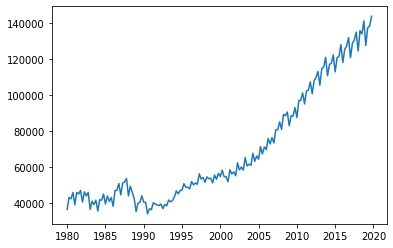

In [5]:
plt.plot(pbiq);
# Vemos un comportamiento de estacionalidad
# los periodos se van repitiendo haciendo ciclos

In [6]:
pbiq['pbiq_log'] = np.log(pbiq)

In [7]:
pbiq['pbiq_log_diff'] = pbiq.pbiq_log - pbiq.pbiq_log.shift(periods=4)

In [8]:
pbiq

,pbi,pbiq_log,pbiq_log_diff
time,,,
1980-01-01,36357.476562,10.501155,NaN
1980-04-01,43102.109375,10.671328,NaN
1980-07-01,42344.484375,10.653593,NaN
1980-10-01,45791.929688,10.731863,NaN
1981-01-01,39025.875000,10.571980,0.070826
...,...,...,...
2018-10-01,141136.390625,11.857482,0.045386
2019-01-01,127434.750000,11.755360,0.024156
2019-04-01,137351.812500,11.830301,0.011887


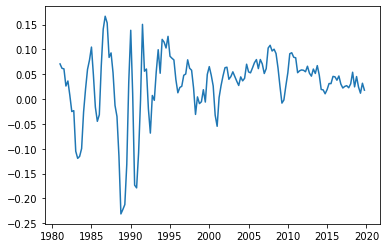

In [9]:
plt.plot(pbiq.pbiq_log_diff.dropna());

In [10]:
pbiq.pbiq_log_diff.dropna().shape

(156,)

In [11]:
a = sm.tsa.stattools.acf(pbiq.pbiq_log_diff.dropna(), fft=False)
b = sm.tsa.stattools.pacf(pbiq.pbiq_log_diff.dropna())

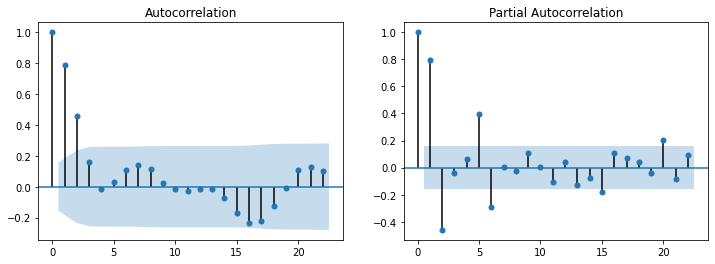

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(pbiq.pbiq_log_diff.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(pbiq.pbiq_log_diff.dropna(), ax=ax2)
# ignorar el primero

In [17]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(pbiq.pbiq_log_diff.dropna(), order=(2,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:          pbiq_log_diff   No. Observations:                  156
Model:                     ARMA(2, 0)   Log Likelihood                 293.752
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 31 May 2020   AIC                           -579.504
Time:                        07:33:52   BIC                           -567.305
Sample:                    01-01-1981   HQIC                          -574.550
                         - 10-01-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0305      0.010      3.157      0.002       0.012       0.049
ar.L1.pbiq_log_diff     1.1405      0.071     16.018      0.000       1.001       1.280
ar.L2.pbiq_log_d

/home/alvin/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


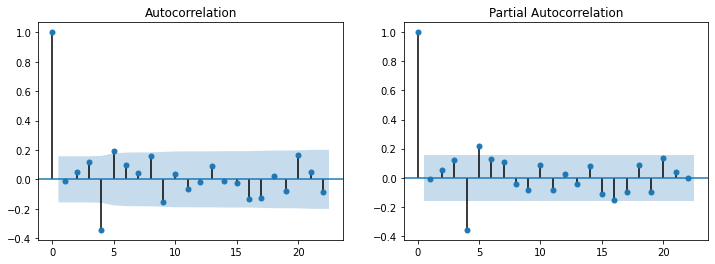

In [90]:
# Gráfica de los residuos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(result.resid.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(result.resid.dropna(), ax=ax2)
# ignorar el primero

# Podemos concluir que el modelo tiene un comportamiento ARMA(2,0), pero enrealidad es un proceso AR(2) MA(0001)